In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
y = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])

In [3]:
a0 = 0        # y-intercept
a1 = 0        # slope
lr = 0.0001   # learning rate
iters = 100
errors = list()

for itr in range(iters):
    error_cost = 0
    pd_a0 = 0
    pd_a1 = 0
    for i in range(len(x)):
        y_pred_i = a0 + a1 * x[i]
        error_cost = error_cost + (y[i] - y_pred_i)**2
        for j in range(len(x)):
            pd_a0 = pd_a0 + (2 * ((a0 + a1 * x[j]) - y[j]))
            pd_a1 = pd_a1 + (2 * x[j] * ((a0 + a1 * x[j]) - y[j]))
        a0 = a0 - lr * pd_a0
        a1 = a1 - lr * pd_a1
    
    if itr % 100 == 0:
        print(itr, a0, a1)
    errors.append(error_cost)

0 0.29986593263514916 1.6985762977266659


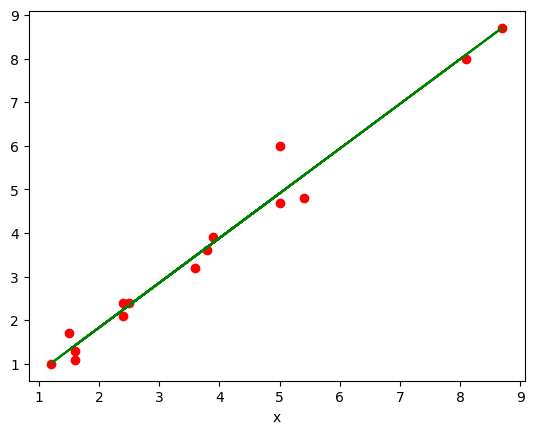

In [4]:
y_pred = a0 + a1*x
plt.scatter(x, y, color='red')
plt.plot(x, y_pred, color='green')
plt.xlabel("x")
plt.show("y")

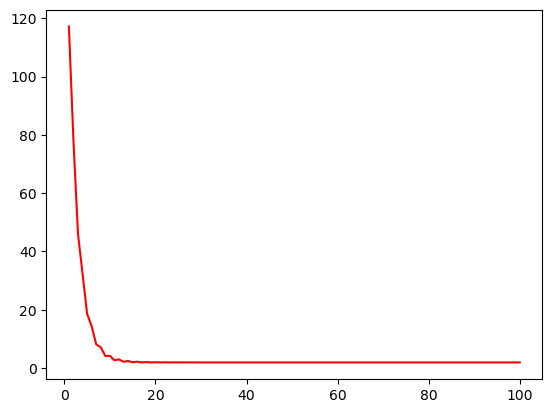

In [5]:
plt.plot(np.arange(1, len(errors)+1), errors, color='red')

### Gradient Descent

Batch gradient descent, also known as vanilla gradient descent, calculates the error for each example within the training dataset. Still, the model is not changed until every training sample has been assessed. The entire procedure is referred to as a cycle and a training epoch.

Some benefits of batch are its computational efficiency, which produces a stable error gradient and a stable convergence. Some drawbacks are that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset to be in memory and available to the algorithm.

#### Advantages
- Fewer model updates mean that this variant of the steepest descent method is more computationally efficient than the stochastic gradient descent method.
- Reducing the update frequency provides a more stable error gradient and a more stable convergence for some problems.
- Separating forecast error calculations and model updates provides a parallel processing-based algorithm implementation.
#### Disadvantages
- A more stable error gradient can cause the model to prematurely converge to a suboptimal set of parameters.
- End-of-training epoch updates require the additional complexity of accumulating prediction errors across all training examples.
- The batch gradient descent method typically requires the entire training dataset in memory and is implemented for use in the algorithm.
- Large datasets can result in very slow model updates or training speeds.
- Slow and require more computational power.

In [59]:
def f(x):
    return x**2 - 5*x

def df(x):
    return 2*x - 5

def gradient_descent(f, df, intial_guess, lr=0.01, epsilon=1e-6, max_iteration=1000):
    """
    Gradient Descent optimization algorithm.
    
    Args:
    f (function): The objective function to minimize.
    df (function): The gradient (derivative) of the objective function.
    initial_guess (array_like): Initial guess for the parameters.
    learning_rate (float): Learning rate or step size for the update (default 0.01).
    epsilon (float): Convergence criterion. The algorithm stops when the change in
        the value of the objective function is less than epsilon (default 1e-6).
    max_iterations (int): Maximum number of iterations (default 1000).
    
    Returns:
    tuple: A tuple containing the optimized parameters and the value of the objective function at the optimum.
    """
    x = np.array(initial_guess)
    for itr in range(max_iteration):
        grad = df(x)
        if np.linalg.norm(grad) < epsilon:           # Homework: Explore about this function np.linalg.norm() 
            break
        print(itr, grad)
        x = x - lr * grad
    return x, f(x)

In [60]:
initial_guess = [5]

optimal_param, min_value = gradient_descent(f, df, initial_guess)

print(optimal_param, min_value)

0 [5]
1 [4.9]
2 [4.802]
3 [4.70596]
4 [4.6118408]
5 [4.51960398]
6 [4.4292119]
7 [4.34062767]
8 [4.25381511]
9 [4.16873881]
10 [4.08536403]
11 [4.00365675]
12 [3.92358362]
13 [3.84511195]
14 [3.76820971]
15 [3.69284551]
16 [3.6189886]
17 [3.54660883]
18 [3.47567665]
19 [3.40616312]
20 [3.33803986]
21 [3.27127906]
22 [3.20585348]
23 [3.14173641]
24 [3.07890168]
25 [3.01732365]
26 [2.95697718]
27 [2.89783763]
28 [2.83988088]
29 [2.78308326]
30 [2.7274216]
31 [2.67287316]
32 [2.6194157]
33 [2.56702739]
34 [2.51568684]
35 [2.4653731]
36 [2.41606564]
37 [2.36774433]
38 [2.32038944]
39 [2.27398165]
40 [2.22850202]
41 [2.18393198]
42 [2.14025334]
43 [2.09744827]
44 [2.05549931]
45 [2.01438932]
46 [1.97410153]
47 [1.9346195]
48 [1.89592711]
49 [1.85800857]
50 [1.8208484]
51 [1.78443143]
52 [1.7487428]
53 [1.71376795]
54 [1.67949259]
55 [1.64590274]
56 [1.61298468]
57 [1.58072499]
58 [1.54911049]
59 [1.51812828]
60 [1.48776571]
61 [1.4580104]
62 [1.42885019]
63 [1.40027319]
64 [1.37226772]
65 [

https://jermwatt.github.io/machine_learning_refined/notes/16_Linear_algebra/16_5_Norms.html

### Stochastic Gradient Descent

By contrast, stochastic gradient descent (SGD) changes the parameters for each training sample one at a time for each training example in the dataset. Depending on the issue, this can make SGD faster than batch gradient descent. One benefit is that the regular updates give us a fairly accurate idea of the rate of improvement.

However, the batch approach is less computationally expensive than the frequent updates. The frequency of such updates can also produce noisy gradients, which could cause the error rate to fluctuate rather than gradually go down.

#### Advantages
- You can instantly see your model’s performance and improvement rates with frequent updates.
- This variant of the steepest descent method is probably the easiest to understand and implement, especially for beginners.
- Increasing the frequency of model updates will allow you to learn more about some issues faster.
- The noisy update process allows the model to avoid local minima (e.g., premature convergence).
- Faster and require less computational power.
- Suitable for the larger dataset.
#### Disadvantages
- Frequent model updates are more computationally intensive than other steepest descent configurations, and it takes considerable time to train the model with large datasets.
- Frequent updates can result in noisy gradient signals. This can result in model parameters and cause errors to fly around (more variance across the training epoch).
- A noisy learning process along the error gradient can also make it difficult for the algorithm to commit to the model’s minimum error.

In [11]:
def f(x):
    return (x+1)**2 + 34

def df(x, data_point):
    return 2*(x+1)*data_point        # We are multiplying the squared loss error on the data_point with respect to x

def sgd(f, df, initial_guess, dataset, lr=0.01, epsilon=1e-6, max_iterations=1000):
    """
    Stochastic Gradient Descent optimization algorithm.
    
    Args:
    f (function): The objective function to minimize.
    df (function): The gradient (derivative) of the objective function.
    initial_guess (array_like): Initial guess for the parameters.
    dataset (array_like): The dataset for stochastic updates.
    learning_rate (float): Learning rate or step size for the update (default 0.01).
    epsilon (float): Convergence criterion. The algorithm stops when the change in
        the value of the objective function is less than epsilon (default 1e-6).
    max_iterations (int): Maximum number of iterations (default 1000).
    
    Returns:
    tuple: A tuple containing the optimized parameters and the value of the objective function at the optimum.
    """
    x = np.array(initial_guess)
    num_samples = len(dataset)
    for _ in range(max_iterations):
        np.random.shuffle(dataset)  # Randomly shuffled the dataset
        for data_point in dataset:
            grad = df(x, data_point)
            if np.linalg.norm(grad) < epsilon:
                break
            x = x - lr * grad
    return x, f(x)
    

In [12]:
initial_guess = [6]
dataset = np.arange(8)

optim_param, min_value = sgd(f, df, initial_guess, dataset)

print(optim_param, min_value)

[-0.99999994] [34.]


### Mini-Batch Gradient Descent

Since mini-batch gradient descent combines the ideas of batch gradient descent with SGD, it is the preferred technique. It divides the training dataset into manageable groups and updates each separately. This strikes a balance between batch gradient descent’s effectiveness and stochastic gradient descent’s durability.

Mini-batch sizes typically range from 50 to 256, although, like with other machine learning techniques, there is no set standard because it depends on the application. The most popular kind in deep learning, this method is used when training a neural network.

#### Advantages
- The model is updated more frequently than the stack gradient descent method, allowing for more robust convergence and avoiding local minima.
- Batch updates provide a more computationally efficient process than stochastic gradient descent.
- Batch processing allows for both the efficiency of not having all the training data in memory and implementing the algorithm.
#### Disadvantages
- Mini-batch requires additional hyperparameters “mini-batch size” to be set for the learning algorithm.
- Error information should be accumulated over a mini-batch of training samples, such as batch gradient descent.
- it will generate complex functions.

In [43]:
def f(x):
    return np.sin(x**2)
    
def df(x, batch):
    return np.cos(x**2) * 2 * x * batch.mean()   # We are multiplying the error of the batch with respect to x

def mini_batch_gradient_descent(f, df, intial_guess, dataset, batch_size=2, lr=0.01, epsilon=1e-6, max_iterations=10000):
    """
    Mini-batch Gradient Descent optimization algorithm.
    
    Args:
    f (function): The objective function to minimize.
    df (function): The gradient (derivative) of the objective function.
    initial_guess (array_like): Initial guess for the parameters.
    dataset (array_like): The dataset for mini-batch updates.
    batch_size (int): Size of mini-batch (default 32).
    learning_rate (float): Learning rate or step size for the update (default 0.01).
    epsilon (float): Convergence criterion. The algorithm stops when the change in
        the value of the objective function is less than epsilon (default 1e-6).
    max_iterations (int): Maximum number of iterations (default 1000).
    
    Returns:
    tuple: A tuple containing the optimized parameters and the value of the objective function at the optimum.
    """
    x = np.array(initial_guess)
    num_samples = len(dataset)
    for _ in range(max_iterations):
        np.random.shuffle(dataset)
        # Selecting a window of batch size
        for i in range(0, num_samples, batch_size):
            batch = dataset[i:i+batch_size]
            grad = df(x, batch)
            if np.linalg.norm(grad) < epsilon:
                break
            x = x - lr * grad
    return x, f(x)

In [44]:
intial_guess = [1]
dataset = np.arange(6)

optim_param, min_value = mini_batch_gradient_descent(f, df, intial_guess, dataset)

print(optim_param, min_value)

[4.85406478] [-1.]


### Momentum Gradient Descent

In [63]:
def f(x):
    return x**2 - 5*x

def df(x):
    return 2*x - 5

def momentum_gradient_descent(f, df, initial_guess, learning_rate=0.01, momentum=0.9, epsilon=1e-6, max_iterations=1000):
    """
    Momentum Gradient Descent optimization algorithm.
    
    Args:
    f (function): The objective function to maximize.
    df (function): The gradient (derivative) of the objective function.
    initial_guess (array_like): Initial guess for the parameters.
    learning_rate (float): Learning rate or step size for the update (default 0.01).
    momentum (float): Momentum parameter to accelerate convergence (default 0.9).
    epsilon (float): Convergence criterion. The algorithm stops when the change in
        the value of the objective function is less than epsilon (default 1e-6).
    max_iterations (int): Maximum number of iterations (default 1000).
    
    Returns:
    tuple: A tuple containing the optimized parameters and the value of the objective function at the optimum.
    """
    x = np.array(initial_guess, dtype=np.float64)
    velocity = np.array([0])
    for itr in range(max_iterations):
        gradient = df(x)
        velocity = momentum * velocity - learning_rate * gradient
        print(f"itr: {itr}, velocity:{velocity}, gradient: {gradient}")
        if np.linalg.norm(gradient) < epsilon:
            break
        x += velocity 
    return x, f(x)

In [64]:
initial_guess = [5]

optim_param, min_value = momentum_gradient_descent(f, df, intial_guess)

itr: 0, velocity:[0.03], gradient: [-3.]
itr: 1, velocity:[0.0564], gradient: [-2.94]
itr: 2, velocity:[0.079032], gradient: [-2.8272]
itr: 3, velocity:[0.09782016], gradient: [-2.669136]
itr: 4, velocity:[0.1127731], gradient: [-2.47349568]
itr: 5, velocity:[0.12397529], gradient: [-2.24794948]
itr: 6, velocity:[0.13157775], gradient: [-1.99999891]
itr: 7, velocity:[0.13578841], gradient: [-1.73684342]
itr: 8, velocity:[0.13686223], gradient: [-1.4652666]
itr: 9, velocity:[0.13509143], gradient: [-1.19154214]
itr: 10, velocity:[0.13079588], gradient: [-0.92135928]
itr: 11, velocity:[0.12431397], gradient: [-0.65976752]
itr: 12, velocity:[0.11599397], gradient: [-0.41113959]
itr: 13, velocity:[0.10618609], gradient: [-0.17915166]
itr: 14, velocity:[0.09523527], gradient: [0.03322051]
itr: 15, velocity:[0.08347483], gradient: [0.22369106]
itr: 16, velocity:[0.07122094], gradient: [0.39064072]
itr: 17, velocity:[0.05876802], gradient: [0.53308261]
itr: 18, velocity:[0.04638503], gradient